## Terrill's Notebook

This notebook is meant to perform analysis on any sudden insights, spark of potential creative solution, or testing an assumption/idea

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [28]:
df_stationary = pd.read_csv("data/stationarity/stationaity_res_2023-06-24T12:59:21.519143.csv")
df_stationary


,Unnamed: 0,item_id,dept_id,cat_id,store_id,state_id,adf_statistic,pvalue,critical_val_1,critical_val_5,critical_val_10,stationarity
0,0,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,-5.344489,4.425791e-06,-3.450569,-2.870447,-2.571515,1
1,1,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,-4.518813,1.818079e-04,-3.450384,-2.870365,-2.571472,1
2,2,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,-5.129796,1.220859e-05,-3.450507,-2.870420,-2.571501,1
3,3,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,-4.396693,3.008580e-04,-3.450887,-2.870586,-2.571590,1
4,4,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,-2.609961,9.095588e-02,-3.450445,-2.870392,-2.571486,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12191,12191,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,-2.682544,7.710799e-02,-3.450632,-2.870474,-2.571530,0
12192,12192,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,-4.822119,4.932769e-05,-3.450507,-2.870420,-2.571501,1
12193,12193,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_2,CA,-16.766807,1.296642e-29,-3.450141,-2.870259,-2.571415,1
12194,12194,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_3,CA,-3.603313,5.697997e-03,-3.450695,-2.870502,-2.571545,1


<Axes: xlabel='pvalue', ylabel='Count'>

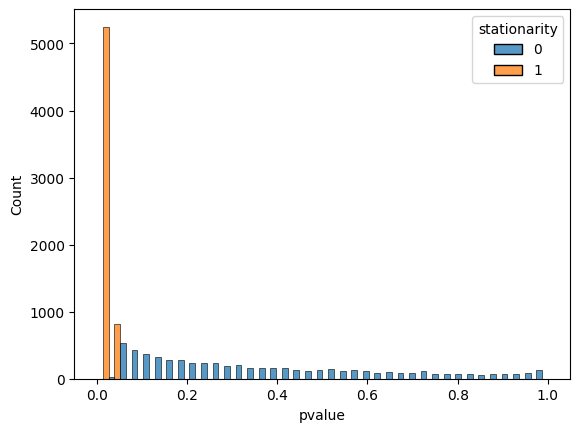

In [29]:
df_stationary["pvalue"] = df_stationary["pvalue"].round(decimals=4)
sns.histplot(df_stationary, x="pvalue", hue="stationarity", multiple="dodge")

<Axes: xlabel='adf_statistic', ylabel='Count'>

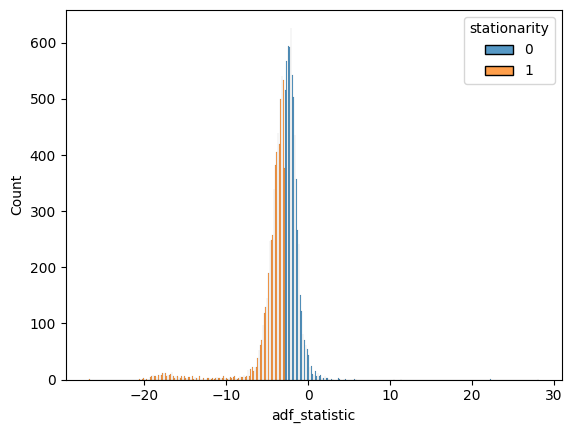

In [30]:
sns.histplot(df_stationary, x="adf_statistic", hue="stationarity", multiple="dodge")

<Axes: xlabel='stationairy_val', ylabel='count'>

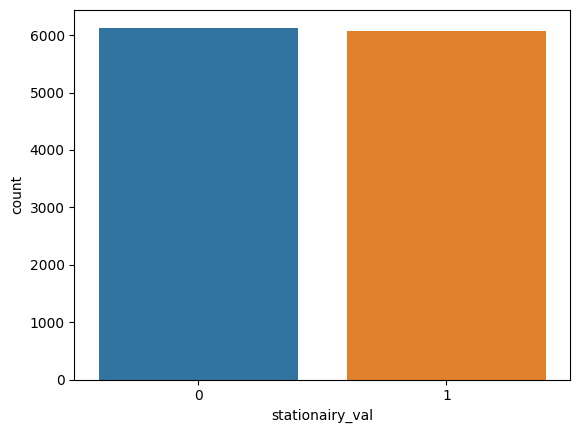

In [10]:
df_stationary_count = df_stationary["stationarity"].value_counts().reset_index()
df_stationary_count.columns = ["stationairy_val", "count"]
df_stationary_count.sort_values(by="count", ascending=False, inplace=True)
sns.barplot(df_stationary_count, x="stationairy_val", y="count")

In [21]:
sns.jitter(df_stationary, x="pvalue", y="adf_statistic", hue="stationarity")

AttributeError: module 'seaborn' has no attribute 'jitter'

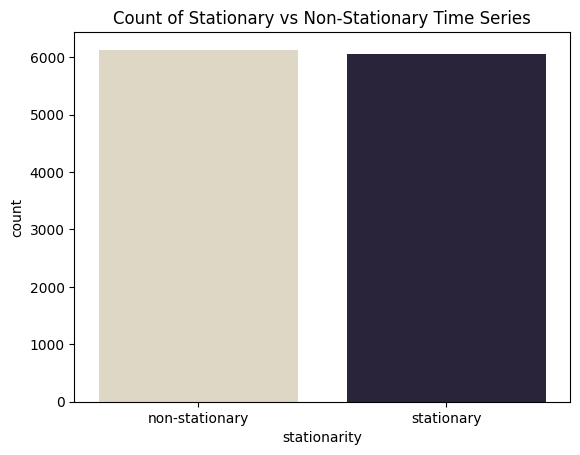

In [26]:
# fig, axes = plt.subplots(1, 2, figsize=(10,5))
palette = "ch:s=-.2,r=.6"
df_stationary_count["stationarity"] = np.where(df_stationary_count["stationairy_val"] == 0, "non-stationary", "stationary")
sns.barplot(df_stationary_count, x="stationarity", y="count", palette=palette).set_title("Count of Stationary vs Non-Stationary Time Series")
plt.savefig("plots/stationairty_count.png")

In [44]:
# load in the california data set
CAL_FILE = "data/data_processor/merged_salescal_price_training_CA_2023-06-22T18:34:18.958283.csv"
df_CA = pd.read_csv(CAL_FILE)
id_cols = [x for x in df_CA.columns if "_id" in x]
station_cols = id_cols + ["stationarity"]
# merge the stationary labels
df_CA = df_CA.merge(df_stationary[station_cols], how="left", on=id_cols)
df_CA

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,month,date_max,snap_CA_sum,snap_TX_sum,snap_WI_sum,sales_mean,sales_sum,sales_max,sales_min,event_sum,sell_price,stationarity
0,0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,11101,1,2011-01-31,0,0,0,1.000000,3,3,0,0,2.00,1
1,1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,11101,2,2011-02-04,4,2,2,1.750000,7,4,0,0,2.00,1
2,2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,11102,2,2011-02-11,6,5,5,0.857143,6,3,0,1,2.00,1
3,3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,11103,2,2011-02-18,0,3,3,1.428571,10,3,0,1,2.00,1
4,4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,11104,2,2011-02-25,0,0,0,1.857143,13,4,0,1,2.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073459,10181651,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,11614,4,2016-04-30,0,0,0,0.000000,0,0,0,1,5.94,1
4073460,10181652,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,11614,5,2016-05-06,6,4,4,0.166667,1,1,0,2,5.94,1
4073461,10181653,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,11615,5,2016-05-13,4,5,4,0.142857,1,1,0,1,5.94,1
4073462,10181654,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,11616,5,2016-05-20,0,1,2,0.000000,0,0,0,0,5.94,1


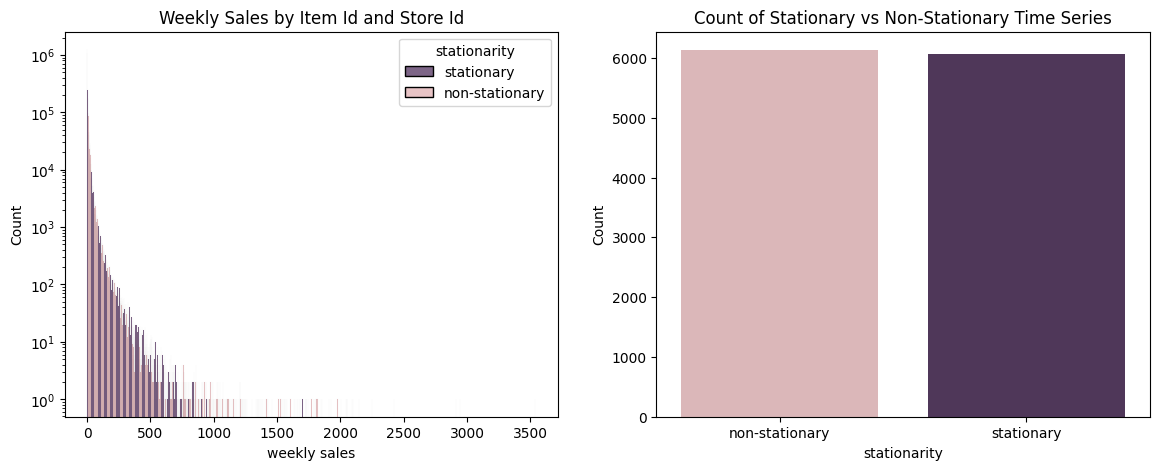

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
#sns.set_palette(palette)
sns.color_palette("ch:s=-.2,r=.6", n_colors=2, as_cmap=True)
# df_CA.rename(columns={"sales_sum": "weekly sales"}, inplace=True)
# df_CA["stationarity"] = np.where(df_CA["stationarity"] == 0, "non-stationary", "stationary")
color_map_list = list(sns.cubehelix_palette(8))
color_map = {"non-stationary": color_map_list[1],
             "stationary": color_map_list[-2]}

title_hist = "Weekly Sales by Item Id and Store Id"
sns.histplot(df_CA,
             x="weekly sales",
             hue="stationarity",
             multiple="dodge",
             log_scale=(False, True),
             binwidth=2.5,
             palette=color_map,
             ax=axes[0]).set_title(title_hist)

df_stationary_count.rename(columns={"count": "Count"}, inplace=True)
df_stationary_count.sort_values(by='Count', ascending=False)
sns.barplot(df_stationary_count,
            x="stationarity",
            y="Count",
            palette=color_map,
            ax=axes[1]).set_title("Count of Stationary vs Non-Stationary Time Series")

plt.savefig("plots/distribution_bargraph.png")

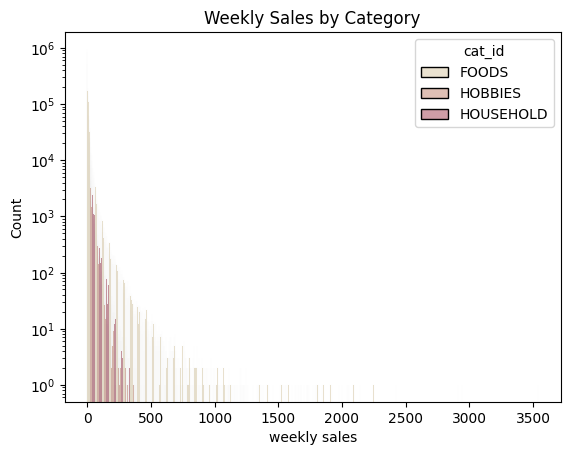

In [58]:
sns.histplot(df_CA,
             x="weekly sales",
             hue="cat_id",
             multiple="dodge",
             log_scale=(False, True),
             binwidth=2.5).set_title("Weekly Sales by Category")
plt.savefig("plots/distribution_category.png")